# **Import Library & Dataset**

In [33]:
!pip install --upgrade tensorflow

In [34]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes
!pip install Sastrawi
!pip install swifter

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
import swifter
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset = pd.read_csv("Data Skripsi Anne NoTgl.csv", encoding="latin-1")

In [ ]:
dataset

,Judul,Isi Berita,Label
0,Kapolri Minta Vaksinasi Booster untuk Lansia D...,CIANJUR - Kapolri Jenderal Listyo Sigit Prabow...,0
1,Sudah Vaksin dan Penyintas Covid-19 Masih Terp...,JAKARTA- Gejala pada infeksi Covid-19 variant ...,1
2,Infeksi Covid-19 Tak Hanya Berbahaya bagi Komo...,DOKTER Spesialis Penyakit Dalam Konsultan Peny...,0
3,MNC Peduli dan Lotte Mart Gelar Sentra Vaksin ...,JAKARTA - Lotte Mart bekerja sama dengan MNC P...,0
4,Kapolda Metro Tinjau Vaksinasi Lansia di Alun-...,"BEKASI - Kapolda Metro Jaya, Irjen Fadil Imran...",0
...,...,...,...
3514,pemerintah Siap Penuhi Stok Vaksin COVID-19 ...,pemerintah Pusat konsisten berkomitmen memenuh...,0
3515,Kisah Keluarga Polisi Diusir oleh Puluhan Prem...,JAKARTA- Keluarga anggota polisi yang bertempa...,1
3516,"Kasus COVID-19 Bertambah 297, Jawa Barat Jua...",JAKARTA -pemerintah kembali memutakhirkan dat...,0
3517,Apakah Infeksi omicron Lebih Parah?,PARA peneliti di Afrika Selatan dan di seluruh...,1


In [ ]:
news = dataset[dataset['Label'] == 0]
covid_news = pd.DataFrame(news)
covid_news.head()

,Judul,Isi Berita,Label
0,Kapolri Minta Vaksinasi Booster untuk Lansia D...,CIANJUR - Kapolri Jenderal Listyo Sigit Prabow...,0
2,Infeksi Covid-19 Tak Hanya Berbahaya bagi Komo...,DOKTER Spesialis Penyakit Dalam Konsultan Peny...,0
3,MNC Peduli dan Lotte Mart Gelar Sentra Vaksin ...,JAKARTA - Lotte Mart bekerja sama dengan MNC P...,0
4,Kapolda Metro Tinjau Vaksinasi Lansia di Alun-...,"BEKASI - Kapolda Metro Jaya, Irjen Fadil Imran...",0
5,"Cirebon PPKM Level 4, tapi Tingkat Hunian Ruma...",CIREBON - Berdasarkan asesmen Kementerian Kese...,0


In [ ]:
covid_news.to_csv("covid_news.csv", index=False)

In [ ]:
clickbait = dataset[dataset['Label'] == 1]
covid_clickbait = pd.DataFrame(clickbait)
covid_clickbait.head()

,Judul,Isi Berita,Label
1,Sudah Vaksin dan Penyintas Covid-19 Masih Terp...,JAKARTA- Gejala pada infeksi Covid-19 variant ...,1
8,"Kunci Sembuh dari Covid-19, Berpikir Positif d...",SEJATINYA virus corona akan hilang dengan send...,1
9,Indonesia Sudah Lewati Gelombang Ketiga Covid-...,"SELAMA satu pekan terakhir, terlihat ada tren ...",1
10,Maaf! Seluruh Objek Wisata di Minahasa Tenggar...,SELURUH objek wisata di Kabupaten Minahasa Ten...,1
12,"Bertambah 1.595, Kecamatan Tambora Jadi Lokasi...",JAKARTA - Kasus aktif Covid-19 di Jakarta Bara...,1


In [ ]:
covid_clickbait.to_csv("covid_clickbait.csv", index=False)

In [ ]:
# load the data
df_news = pd.read_csv("covid_news.csv")
df_clickbait = pd.read_csv("covid_clickbait.csv")

In [ ]:
df_news

,Judul,Isi Berita,Label
0,Kapolri Minta Vaksinasi Booster untuk Lansia D...,CIANJUR - Kapolri Jenderal Listyo Sigit Prabow...,0
1,Infeksi Covid-19 Tak Hanya Berbahaya bagi Komo...,DOKTER Spesialis Penyakit Dalam Konsultan Peny...,0
2,MNC Peduli dan Lotte Mart Gelar Sentra Vaksin ...,JAKARTA - Lotte Mart bekerja sama dengan MNC P...,0
3,Kapolda Metro Tinjau Vaksinasi Lansia di Alun-...,"BEKASI - Kapolda Metro Jaya, Irjen Fadil Imran...",0
4,"Cirebon PPKM Level 4, tapi Tingkat Hunian Ruma...",CIREBON - Berdasarkan asesmen Kementerian Kese...,0
...,...,...,...
2733,Pemprov DKI Klaim Tingkat Kesembuhan Virus Cor...,JAKARTA- pemerintah Provinsi (Pemprov) DKI Ja...,0
2734,Anies Baswedan Paparkan Perkembangan COVID-19...,"JAKARTA- Gubernur DKI Jakarta,Anies Baswedanme...",0
2735,pemerintah Siap Penuhi Stok Vaksin COVID-19 ...,pemerintah Pusat konsisten berkomitmen memenuh...,0
2736,"Kasus COVID-19 Bertambah 297, Jawa Barat Jua...",JAKARTA -pemerintah kembali memutakhirkan dat...,0


In [ ]:
df_clickbait

,Judul,Isi Berita,Label
0,Sudah Vaksin dan Penyintas Covid-19 Masih Terp...,JAKARTA- Gejala pada infeksi Covid-19 variant ...,1
1,"Kunci Sembuh dari Covid-19, Berpikir Positif d...",SEJATINYA virus corona akan hilang dengan send...,1
2,Indonesia Sudah Lewati Gelombang Ketiga Covid-...,"SELAMA satu pekan terakhir, terlihat ada tren ...",1
3,Maaf! Seluruh Objek Wisata di Minahasa Tenggar...,SELURUH objek wisata di Kabupaten Minahasa Ten...,1
4,"Bertambah 1.595, Kecamatan Tambora Jadi Lokasi...",JAKARTA - Kasus aktif Covid-19 di Jakarta Bara...,1
...,...,...,...
776,Begini Penampakan 26 Mutasi Protein di Varian ...,"VIRUS COVID-19 memang memiliki banyak mutasi, ...",1
777,Petunjuk Pelaksanaan Perayaan Natal 2021 di Te...,HARIRaya Natal dan Tahun Baru (Nataru) tinggal...,1
778,"Tinggalkan Twitter, Jack Dorsey Fokus ke Bitcoin?",JACKDorsey baru saja mengumumkan pengunduran d...,1
779,Kisah Keluarga Polisi Diusir oleh Puluhan Prem...,JAKARTA- Keluarga anggota polisi yang bertempa...,1


# **Exploratory Data Analysis**

In [ ]:
df_clickbait.isnull().sum()

Judul         0
Isi Berita    0
Label         0
dtype: int64

In [ ]:
df_news.isnull().sum()

Judul         0
Isi Berita    0
Label         0
dtype: int64

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Judul       2738 non-null   object
 1   Isi Berita  2738 non-null   object
 2   Label       2738 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 64.3+ KB


In [ ]:
df_clickbait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Judul       781 non-null    object
 1   Isi Berita  781 non-null    object
 2   Label       781 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.4+ KB


In [ ]:
# Concatenate Real and Clickbait News
df = pd.concat([df_news, df_clickbait]).reset_index(drop = True)
df

,Judul,Isi Berita,Label
0,Kapolri Minta Vaksinasi Booster untuk Lansia D...,CIANJUR - Kapolri Jenderal Listyo Sigit Prabow...,0
1,Infeksi Covid-19 Tak Hanya Berbahaya bagi Komo...,DOKTER Spesialis Penyakit Dalam Konsultan Peny...,0
2,MNC Peduli dan Lotte Mart Gelar Sentra Vaksin ...,JAKARTA - Lotte Mart bekerja sama dengan MNC P...,0
3,Kapolda Metro Tinjau Vaksinasi Lansia di Alun-...,"BEKASI - Kapolda Metro Jaya, Irjen Fadil Imran...",0
4,"Cirebon PPKM Level 4, tapi Tingkat Hunian Ruma...",CIREBON - Berdasarkan asesmen Kementerian Kese...,0
...,...,...,...
3514,Begini Penampakan 26 Mutasi Protein di Varian ...,"VIRUS COVID-19 memang memiliki banyak mutasi, ...",1
3515,Petunjuk Pelaksanaan Perayaan Natal 2021 di Te...,HARIRaya Natal dan Tahun Baru (Nataru) tinggal...,1
3516,"Tinggalkan Twitter, Jack Dorsey Fokus ke Bitcoin?",JACKDorsey baru saja mengumumkan pengunduran d...,1
3517,Kisah Keluarga Polisi Diusir oleh Puluhan Prem...,JAKARTA- Keluarga anggota polisi yang bertempa...,1


# **Preprocessing**

In [ ]:
#Case Folding
df['Judul'] = df['Judul'].str.lower()
df['Isi Berita'] = df['Isi Berita'].str.lower()
df.head()

,Judul,Isi Berita,Label
0,kapolri minta vaksinasi booster untuk lansia d...,cianjur - kapolri jenderal listyo sigit prabow...,0
1,infeksi covid-19 tak hanya berbahaya bagi komo...,dokter spesialis penyakit dalam konsultan peny...,0
2,mnc peduli dan lotte mart gelar sentra vaksin ...,jakarta - lotte mart bekerja sama dengan mnc p...,0
3,kapolda metro tinjau vaksinasi lansia di alun-...,"bekasi - kapolda metro jaya, irjen fadil imran...",0
4,"cirebon ppkm level 4, tapi tingkat hunian ruma...",cirebon - berdasarkan asesmen kementerian kese...,0


In [ ]:
#Cleaning 
def cleaning_text(text):
    # Menghilangkan baris baru, tab, underline.
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # Menghilangkan simbol emoticon dan huruf selain ascii
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus mention (@), link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove_empty_space
    text = re.sub(r'', '', text.strip())
    #remove multiple space
    text = re.sub(r'\s\s+', ' ', text)
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [ ]:
df['Judul'] = df['Judul'].apply(lambda x: cleaning_text(x))
df['Isi Berita'] = df['Isi Berita'].apply(lambda x: cleaning_text(x))
df.head()

,Judul,Isi Berita,Label
0,kapolri minta vaksinasi booster untuk lansia d...,cianjur - kapolri jenderal listyo sigit prabow...,0
1,infeksi covid-19 tak hanya berbahaya bagi komo...,dokter spesialis penyakit dalam konsultan peny...,0
2,mnc peduli dan lotte mart gelar sentra vaksin ...,jakarta - lotte mart bekerja sama dengan mnc p...,0
3,kapolda metro tinjau vaksinasi lansia di alun-...,"bekasi - kapolda metro jaya, irjen fadil imran...",0
4,"cirebon ppkm level 4, tapi tingkat hunian ruma...",cirebon - berdasarkan asesmen kementerian kese...,0


In [ ]:
#Tokenizing
def tokenization(text):
	text = re.split('\W+', text)
	return text

In [ ]:
df['Judul'] = df['Judul'].apply(lambda x: tokenization(x.lower()))
df['Isi Berita'] = df['Isi Berita'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,Judul,Isi Berita,Label
0,"[kapolri, minta, vaksinasi, booster, untuk, la...","[cianjur, kapolri, jenderal, listyo, sigit, pr...",0
1,"[infeksi, covid, 19, tak, hanya, berbahaya, ba...","[dokter, spesialis, penyakit, dalam, konsultan...",0
2,"[mnc, peduli, dan, lotte, mart, gelar, sentra,...","[jakarta, lotte, mart, bekerja, sama, dengan, ...",0
3,"[kapolda, metro, tinjau, vaksinasi, lansia, di...","[bekasi, kapolda, metro, jaya, irjen, fadil, i...",0
4,"[cirebon, ppkm, level, 4, tapi, tingkat, hunia...","[cirebon, berdasarkan, asesmen, kementerian, k...",0
5,"[melawan, covid, 19, psikolog, berpikir, sehat...","[psikolog, dr, novrans, eka, saputra, mengatak...",0
6,"[pandemi, covid, 19, bnpb, fokus, pada, peruba...","[jakarta, kepala, badan, nasional, penanggulan...",0
7,"[kemenkes, vaksin, booster, kurangi, risiko, k...","[kementerian, kesehatan, mencatat, 35, orang, ...",0
8,"[berkurang, 60, orang, wisma, atlet, rawat, 3,...","[jakarta, jumlah, pasien, rawat, inap, di, rum...",0
9,"[ini, 8, gejala, omicron, pada, orang, yang, s...","[omicron, dapat, menginfeksi, orang, yang, sud...",0


In [ ]:
#Stop Removal

stopword = nltk.corpus.stopwords.words('indonesian')

stopword = [e for e in stopword if e not in ('akankah', 'apa', 'apakah', 'bagaimana', 'bagaimanakah', 'beberapa', 'begini', 'beginilah', 'benarkah', 'berapa', 'berapakah', 'berikut', 'bisakah', 'bolehkah', 'cara', 'hal', 'ini', 'inikah', 'inilah', 'kapan', 'kapankah', 'kok', 'mengapa', 'menurut', 'mungkinkah', 'pentingnya', 'siapa', 'siapakah', 'waduh', 'wah')]

print(stopword)

data = pd.DataFrame(stopword) 
    
# saving the dataframe 
# data.to_csv('stopword_sastrawi.csv') 

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apaan', 'apabila', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beginian', 'beginikah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bers

In [ ]:
def remove_stopwords(text):
	text = [word for word in text if word not in stopword]
	return text

df['Judul'] = df['Judul'].apply(lambda x: remove_stopwords(x))
df['Isi Berita'] = df['Isi Berita'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Judul,Isi Berita,Label
0,"[kapolri, vaksinasi, booster, lansia, dimaksim...","[cianjur, kapolri, jenderal, listyo, sigit, pr...",0
1,"[infeksi, covid, 19, berbahaya, komorbid]","[dokter, spesialis, penyakit, konsultan, penya...",0
2,"[mnc, peduli, lotte, mart, gelar, sentra, vaks...","[jakarta, lotte, mart, mnc, peduli, menghelat,...",0
3,"[kapolda, metro, tinjau, vaksinasi, lansia, al...","[bekasi, kapolda, metro, jaya, irjen, fadil, i...",0
4,"[cirebon, ppkm, level, 4, tingkat, hunian, rum...","[cirebon, berdasarkan, asesmen, kementerian, k...",0
5,"[melawan, covid, 19, psikolog, berpikir, sehat...","[psikolog, dr, novrans, eka, saputra, berpikir...",0
6,"[pandemi, covid, 19, bnpb, fokus, perubahan, p...","[jakarta, kepala, badan, nasional, penanggulan...",0
7,"[kemenkes, vaksin, booster, kurangi, risiko, k...","[kementerian, kesehatan, mencatat, 35, orang, ...",0
8,"[berkurang, 60, orang, wisma, atlet, rawat, 3,...","[jakarta, pasien, rawat, inap, rumah, sakit, d...",0
9,"[ini, 8, gejala, omicron, orang, suntik, vaksi...","[omicron, menginfeksi, orang, vaksin, covid, 1...",0


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Judul']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for document in df['Isi Berita']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

Streaming output truncated to the last 5000 lines.
endemicfenomena : endemicfenomena
spanish : spanish
bertansformasinya : bertansformasinya
memperlonggar : longgar
mengenyampingkan : mengenyampingkan
difacebook : difacebook
yorkmembatasi : yorkmembatasi
voa : voa
segitiga : segitiga
tarifnyajumlah : tarifnyajumlah
menampilkanpenari : menampilkanpenari
erotisdi : erotisdi
menjadiviraldi : menjadiviraldi
kepalang : kepalang
murkaberawal : murkaberawal
tahunpesta : tahunpesta
kerastidak : kerastidak
aparatbupati : aparatbupati
besarbupati : besarbupati
polisipolres : polisipolres
dalampihak : dalampihak
ajangaustralia : ajangaustralia
2021sebagaimana : 2021sebagaimana
19masalahnya : 19masalahnya
casper : casper
ruud : ruud
tennis365 : tennis365
menentangnya : tentang
bahwavaksin : bahwavaksin
malone : malone
tiruan : tiru
dimetabolisme : metabolisme
industriprotein : industriprotein
onlinemenjadi : onlinemenjadi
kesukaannya : suka
telekonsultasionlinedokter : telekonsultasionlinedokter
u

In [ ]:
df['Judul'] = df['Judul'].swifter.apply(get_stemmed_term)
df['Isi Berita'] = df['Isi Berita'].swifter.apply(get_stemmed_term)
df.head()

Pandas Apply:   0%|          | 0/3519 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3519 [00:00<?, ?it/s]

,Judul,Isi Berita,Label
0,"[kapolri, vaksinasi, booster, lansia, maksimal]","[cianjur, kapolri, jenderal, listyo, sigit, pr...",0
1,"[infeksi, covid, 19, bahaya, komorbid]","[dokter, spesialis, sakit, konsultan, sakit, t...",0
2,"[mnc, peduli, lotte, mart, gelar, sentra, vaks...","[jakarta, lotte, mart, mnc, peduli, helat, sen...",0
3,"[kapolda, metro, tinjau, vaksinasi, lansia, al...","[bekas, kapolda, metro, jaya, irjen, fadil, im...",0
4,"[cirebon, ppkm, level, 4, tingkat, huni, rumah...","[cirebon, dasar, asesmen, menteri, sehat, kota...",0


In [ ]:
# join the words into a string (words seperated by " ")
df['Judul'] = df['Judul'].apply(lambda x: " ".join(x))
df['Isi Berita'] = df['Isi Berita'].apply(lambda x: " ".join(x))

In [ ]:
df

,Judul,Isi Berita,Label
0,kapolri vaksinasi booster lansia maksimal,cianjur kapolri jenderal listyo sigit prabowo ...,0
1,infeksi covid 19 bahaya komorbid,dokter spesialis sakit konsultan sakit tropik ...,0
2,mnc peduli lotte mart gelar sentra vaksin boos...,jakarta lotte mart mnc peduli helat sentra vak...,0
3,kapolda metro tinjau vaksinasi lansia alun alu...,bekas kapolda metro jaya irjen fadil imran dam...,0
4,cirebon ppkm level 4 tingkat huni rumah sakit ...,cirebon dasar asesmen menteri sehat kota cireb...,0
...,...,...,...
3514,begini tampak 26 mutasi protein varian omicron,virus covid 19 milik mutasi baru b 11529 varia...,1
3515,tunjuk laksana raya natal 2021 pandemi,hariraya natal nataru tinggal beberapa minggu ...,1
3516,tinggal twitter jack dorsey fokus bitcoin,jackdorsey umum undur jabat ceo twitter dorsey...,1
3517,kisah keluarga polisi usir puluh preman rumah ...,jakarta keluarga anggota polisi tempat tinggal...,1


In [ ]:
df.to_csv("okezone_clean_fix.csv", index=False)

# **Visualisasi Data**

In [35]:
df = pd.read_csv("okezone_clean_fix.csv", encoding="latin-1")

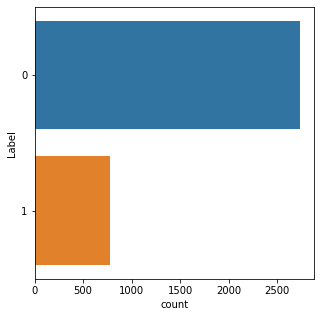

In [36]:
# plot the number of samples in 'subject'
plt.figure(figsize = (5, 5))
sns.countplot(y = "Label", data = df)

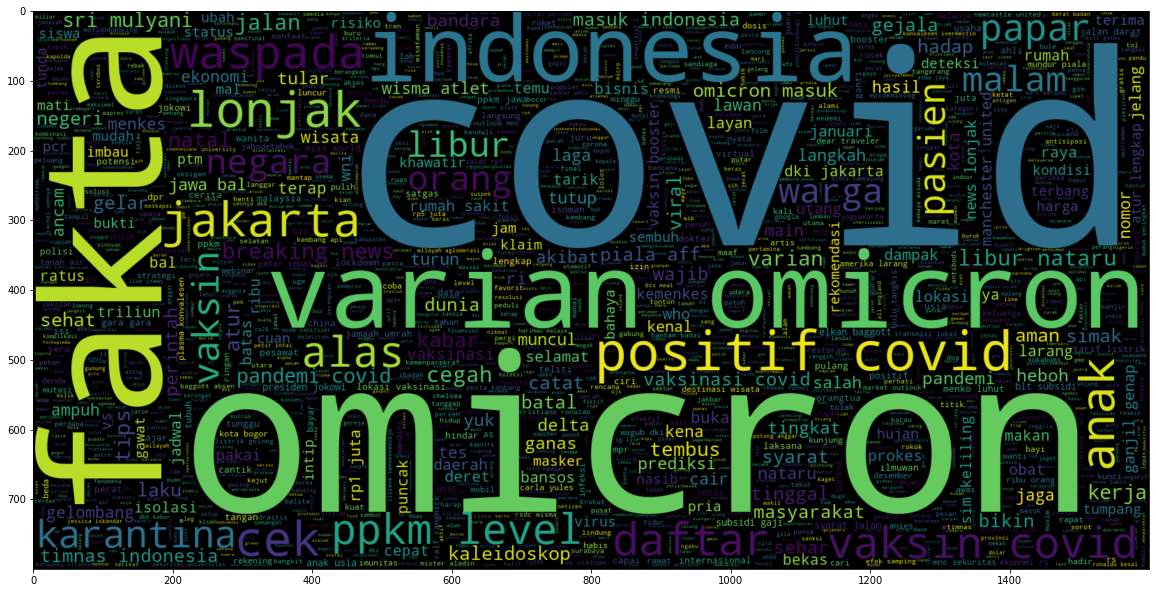

In [37]:
# plot the word cloud for text that is Clickbait
stopword = nltk.corpus.stopwords.words('indonesian')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopword).generate(" ".join(df[df.Label == 1].Judul))
plt.imshow(wc, interpolation = 'bilinear')

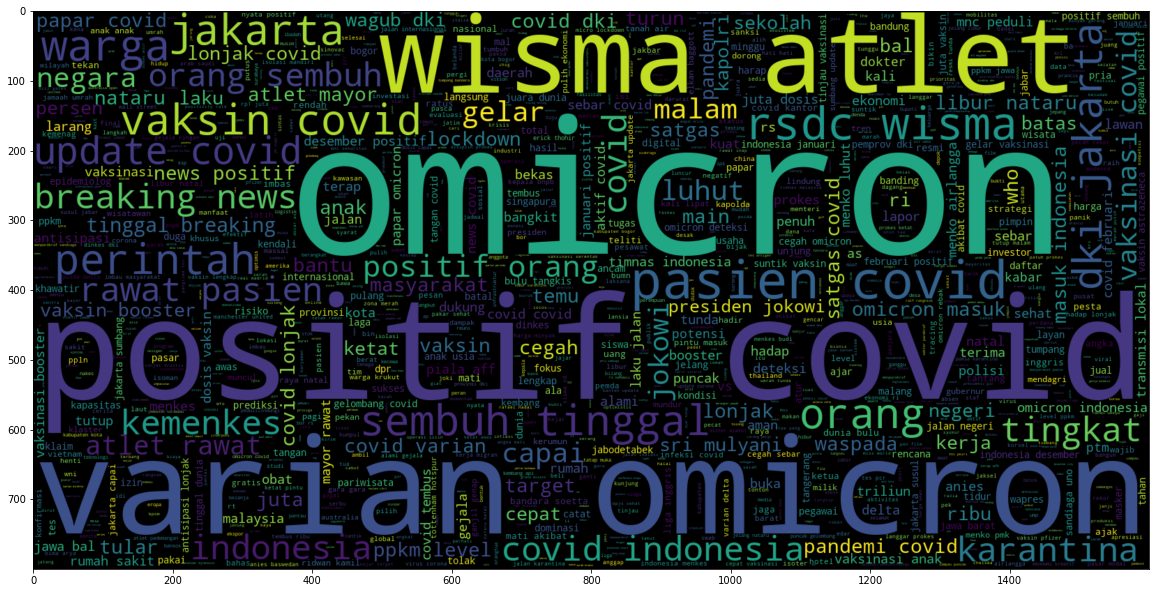

In [38]:
# plot the word cloud for text that is News
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopword).generate(" ".join(df[df.Label == 0].Judul))
plt.imshow(wc, interpolation = 'bilinear')

In [39]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.Judul:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 20


In [40]:
! pip install --upgrade plotly

     |████████████████████████████████| 28.8 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [41]:
# # visualize the distribution of number of words in a text
# import plotly.express as px #interactive visualizations
# fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.Judul], nbins = 100)
# fig.show()

# **Vectorization Word2Vec**

In [70]:
df = pd.read_csv("okezone_clean_fix.csv", encoding="latin-1")

In [71]:
y = df['Label'].values

In [72]:
X = [d.split() for d in df['Judul'].tolist()]

In [73]:
type(X[0])

list

In [74]:
print(X[0])

['kapolri', 'vaksinasi', 'booster', 'lansia', 'maksimal']


In [75]:
DIM = 50
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=5, min_count=1)

In [76]:
len(w2v_model.wv.vocab)

4561

In [77]:
w2v_model.wv['omicron']

array([-0.12873831,  0.14389178,  0.16657984, -0.23644316,  0.07229486,
       -0.613083  , -0.57556415,  0.08824481,  0.39512557, -0.5537453 ,
       -0.90022093, -0.17829199,  0.7028091 ,  0.8462931 , -0.12332597,
        0.41673544,  0.739302  , -0.07801466, -1.4062452 ,  0.30728468,
       -0.24726024,  0.18179746,  0.8103565 ,  0.62224364, -0.24557218,
       -0.6025461 ,  0.17987041,  0.20245135,  0.47385803, -0.8696293 ,
        0.65275836, -0.20996925,  0.28211597, -1.0470667 ,  0.26081574,
       -0.23780249, -0.11004912,  0.78161734, -0.6799236 , -0.5641469 ,
       -0.06945042, -0.27581796, -0.49781927, -0.78466517,  0.20743091,
       -0.45282403,  0.3069063 , -0.30079684,  0.41766417,  0.43627408],
      dtype=float32)

In [78]:
w2v_model.wv.most_similar('omicron')

[('gelar', 0.9998523592948914),
 ('2022', 0.9998367428779602),
 ('sehat', 0.9998300671577454),
 ('perintah', 0.9998078942298889),
 ('pandemi', 0.9998065233230591),
 ('tutup', 0.9998064637184143),
 ('tingkat', 0.9997968673706055),
 ('begini', 0.9997956156730652),
 ('2021', 0.9997730255126953),
 ('juta', 0.9997725486755371)]

In [79]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [80]:
X = tokenizer.texts_to_sequences(X)

In [81]:
tokenizer.word_index

{'covid': 1,
 '19': 2,
 'omicron': 3,
 'ini': 4,
 'indonesia': 5,
 'positif': 6,
 'vaksin': 7,
 'varian': 8,
 '4': 9,
 'tambah': 10,
 'jakarta': 11,
 'pasien': 12,
 'orang': 13,
 '2022': 14,
 'vaksinasi': 15,
 '3': 16,
 '2021': 17,
 'lonjak': 18,
 'dki': 19,
 '2': 20,
 'atlet': 21,
 'wisma': 22,
 'tinggal': 23,
 'anak': 24,
 'sembuh': 25,
 'warga': 26,
 'pandemi': 27,
 '1': 28,
 'ppkm': 29,
 'karantina': 30,
 '6': 31,
 'jalan': 32,
 'nataru': 33,
 '5': 34,
 'masuk': 35,
 'rsdc': 36,
 'rawat': 37,
 'juta': 38,
 'jokowi': 39,
 'perintah': 40,
 'satgas': 41,
 'libur': 42,
 'papar': 43,
 'breaking': 44,
 'news': 45,
 'booster': 46,
 'level': 47,
 'update': 48,
 'cegah': 49,
 'tingkat': 50,
 'luhut': 51,
 'gelar': 52,
 'kemenkes': 53,
 'capai': 54,
 'malam': 55,
 'sebar': 56,
 '11': 57,
 'negara': 58,
 'dunia': 59,
 'bal': 60,
 'waspada': 61,
 'laku': 62,
 'tembus': 63,
 'januari': 64,
 'rumah': 65,
 'tinggi': 66,
 'menko': 67,
 'ekonomi': 68,
 'natal': 69,
 'sehat': 70,
 'negeri': 71,
 'pr

In [82]:
[len(x) for x in X]

[5,
 5,
 12,
 8,
 9,
 7,
 7,
 7,
 12,
 11,
 8,
 10,
 9,
 8,
 4,
 8,
 9,
 8,
 10,
 7,
 17,
 8,
 8,
 7,
 7,
 13,
 10,
 9,
 7,
 8,
 7,
 10,
 8,
 10,
 10,
 10,
 10,
 17,
 8,
 8,
 4,
 8,
 10,
 6,
 7,
 7,
 8,
 9,
 11,
 8,
 7,
 9,
 10,
 7,
 11,
 7,
 8,
 8,
 17,
 9,
 10,
 7,
 10,
 9,
 10,
 10,
 10,
 9,
 7,
 8,
 10,
 9,
 5,
 17,
 8,
 8,
 10,
 7,
 8,
 8,
 8,
 10,
 8,
 9,
 10,
 9,
 9,
 7,
 10,
 6,
 8,
 6,
 7,
 8,
 8,
 17,
 8,
 8,
 10,
 10,
 7,
 8,
 8,
 10,
 7,
 9,
 8,
 10,
 10,
 7,
 7,
 9,
 7,
 11,
 7,
 9,
 8,
 10,
 12,
 12,
 6,
 8,
 12,
 7,
 8,
 7,
 8,
 17,
 8,
 8,
 8,
 8,
 12,
 11,
 11,
 8,
 8,
 9,
 10,
 5,
 11,
 6,
 7,
 5,
 6,
 8,
 13,
 8,
 7,
 9,
 9,
 7,
 9,
 9,
 7,
 10,
 7,
 9,
 6,
 16,
 7,
 7,
 8,
 9,
 6,
 7,
 8,
 10,
 11,
 9,
 8,
 10,
 6,
 5,
 5,
 6,
 8,
 8,
 9,
 8,
 5,
 10,
 12,
 10,
 8,
 7,
 11,
 11,
 10,
 10,
 8,
 9,
 9,
 8,
 8,
 6,
 9,
 11,
 13,
 17,
 9,
 8,
 10,
 9,
 12,
 7,
 9,
 13,
 9,
 12,
 9,
 12,
 5,
 9,
 7,
 8,
 9,
 9,
 7,
 8,
 10,
 6,
 7,
 11,
 6,
 7,
 9,
 11,
 11,
 11,
 8,
 7,

<function matplotlib.pyplot.show>

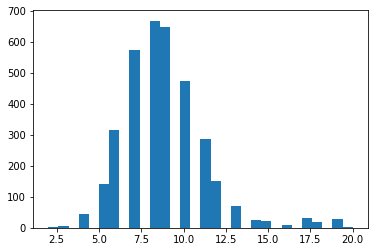

In [83]:
#visualisasi jumlah kata setiap Judul
plt.hist([len(x) for x in X], bins = 30)
plt.show

In [84]:
nos = np.array([len(x) for x in X])
len(nos[nos>20])

0

In [85]:
maxlen = 20
X = pad_sequences(X, maxlen=maxlen)

In [86]:
len(X[101])

20

In [87]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [88]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix

In [89]:
embedding_vectors = get_weight_matrix(w2v_model)

In [90]:
embedding_vectors.shape

(4562, 50)

# **Bi-LSTM**

In [91]:
!pip install tensorflow
!pip install --upgrade tensorflow
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from keras import backend as K

import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from google.colab import files

from numpy import dot
from numpy.linalg import norm
from keras.backend import int_shape
from keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [92]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 781
Before OverSampling, counts of label '0': 2738 

After OverSampling, the shape of train_X: (5476, 20)
After OverSampling, the shape of train_y: (5476,) 

After OverSampling, counts of label '1': 2738
After OverSampling, counts of label '0': 2738


In [93]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors],input_length = maxlen, trainable = False))
model.add(Bidirectional((LSTM (units=128))))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 50)            228100    
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              183296    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 411,653
Trainable params: 183,553
Non-trainable params: 228,100
_________________________________________________________________


In [95]:
filepath = 'model_kfold.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='loss', patience=5)
callbacks_list = [checkpoint, early_stopping]

In [96]:
k = 10
kf = KFold(n_splits=k, random_state=None)
acc_score = []
prec_score = []
rec_score = []
fscore = []
history = []
conf_matrix = []

for train_index , test_index in kf.split(X):
  X_train , X_test = X[train_index], X[test_index]
  y_train , y_test = y[train_index] , y[test_index]
    
  #Fitting the data to the model
  history.append(model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks_list, verbose=0))
  y_pred = (model.predict(X_test)>=0.5).astype(int)

  acc = accuracy_score(y_test , y_pred)
  acc_score.append(acc)
  prec = precision_score(y_test , y_pred)
  prec_score.append(prec)
  rec = recall_score(y_test , y_pred)
  rec_score.append(rec)
  f1 = f1_score(y_test, y_pred)
  fscore.append(f1)
  matrix = confusion_matrix(y_test,y_pred)
  conf_matrix.append(matrix)


avg_acc_score = sum(acc_score)/k
avg_prec_score = sum(prec_score)/k
avg_rec_score = sum(rec_score)/k
avg_f1_score = sum(fscore)/k
avg_matrix_arrays = np.mean(conf_matrix, axis=0)
 
print('accuracy of each fold - {}'.format(acc_score))
print('precision of each fold - {}'.format(prec_score))
print('recall of each fold - {}'.format(rec_score))
print('f1-score of each fold - {}'.format(fscore))
print('Confusion Matrix :\n', conf_matrix)
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg precision : {}'.format(avg_prec_score))
print('Avg recall : {}'.format(avg_rec_score))
print('Avg F1-score : {}'.format(avg_f1_score))
print("Avg Confusion Matrix :\n", avg_matrix_arrays)


Epoch 1: val_acc improved from -inf to 0.23358, saving model to model_kfold.hdf5

Epoch 2: val_acc improved from 0.23358 to 0.25730, saving model to model_kfold.hdf5

Epoch 3: val_acc improved from 0.25730 to 0.32664, saving model to model_kfold.hdf5

Epoch 4: val_acc improved from 0.32664 to 0.67701, saving model to model_kfold.hdf5

Epoch 5: val_acc did not improve from 0.67701

Epoch 6: val_acc did not improve from 0.67701

Epoch 7: val_acc improved from 0.67701 to 0.73540, saving model to model_kfold.hdf5

Epoch 8: val_acc did not improve from 0.73540

Epoch 9: val_acc did not improve from 0.73540

Epoch 10: val_acc did not improve from 0.73540

Epoch 11: val_acc did not improve from 0.73540

Epoch 12: val_acc did not improve from 0.73540

Epoch 13: val_acc did not improve from 0.73540

Epoch 14: val_acc did not improve from 0.73540

Epoch 15: val_acc did not improve from 0.73540

Epoch 16: val_acc did not improve from 0.73540

Epoch 17: val_acc did not improve from 0.73540

Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 1: val_acc improved from 0.73540 to 0.95620, saving model to model_kfold.hdf5

Epoch 2: val_acc did not improve from 0.95620

Epoch 3: val_acc did not improve from 0.95620

Epoch 4: val_acc did not improve from 0.95620

Epoch 5: val_acc improved from 0.95620 to 0.96350, saving model to model_kfold.hdf5

Epoch 6: val_acc did not improve from 0.96350

Epoch 7: val_acc did not improve from 0.96350

Epoch 8: val_acc did not improve from 0.96350

Epoch 9: val_acc did not improve from 0.96350

Epoch 10: val_acc did not improve from 0.96350

Epoch 11: val_acc did not improve from 0.96350

Epoch 12: val_acc did not improve from 0.96350

Epoch 13: val_acc did not improve from 0.96350

Epoch 14: val_acc did not improve from 0.96350

Epoch 15: val_acc did not improve from 0.96350

Epoch 16: val_acc did not improve from 0.96350

Epoch 17: val_acc did not improve from 0.96350

Epoch 18: val_acc did not improve from 0.96350

Epoch 19: val_acc did not improve from 0.96350

Epoch 20: val_acc di

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 1: val_acc improved from 0.96350 to 1.00000, saving model to model_kfold.hdf5

Epoch 2: val_acc did not improve from 1.00000

Epoch 3: val_acc did not improve from 1.00000

Epoch 4: val_acc did not improve from 1.00000

Epoch 5: val_acc did not improve from 1.00000

Epoch 6: val_acc did not improve from 1.00000

Epoch 7: val_acc did not improve from 1.00000

Epoch 8: val_acc did not improve from 1.00000

Epoch 9: val_acc did not improve from 1.00000

Epoch 10: val_acc did not improve from 1.00000

Epoch 11: val_acc did not improve from 1.00000

Epoch 12: val_acc did not improve from 1.00000

Epoch 13: val_acc did not improve from 1.00000

Epoch 14: val_acc did not improve from 1.00000

Epoch 15: val_acc did not improve from 1.00000

Epoch 16: val_acc did not improve from 1.00000

Epoch 17: val_acc did not improve from 1.00000

Epoch 18: val_acc did not improve from 1.00000

Epoch 19: val_acc did not improve from 1.00000

Epoch 20: val_acc did not improve from 1.00000

Epoch 21: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 1: val_acc did not improve from 1.00000

Epoch 2: val_acc did not improve from 1.00000

Epoch 3: val_acc did not improve from 1.00000

Epoch 4: val_acc did not improve from 1.00000

Epoch 5: val_acc did not improve from 1.00000

Epoch 6: val_acc did not improve from 1.00000

Epoch 7: val_acc did not improve from 1.00000

Epoch 8: val_acc did not improve from 1.00000

Epoch 9: val_acc did not improve from 1.00000

Epoch 10: val_acc did not improve from 1.00000

Epoch 11: val_acc did not improve from 1.00000

Epoch 12: val_acc did not improve from 1.00000

Epoch 13: val_acc did not improve from 1.00000

Epoch 14: val_acc did not improve from 1.00000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 1: val_acc did not improve from 1.00000

Epoch 2: val_acc did not improve from 1.00000

Epoch 3: val_acc did not improve from 1.00000

Epoch 4: val_acc did not improve from 1.00000

Epoch 5: val_acc did not improve from 1.00000

Epoch 6: val_acc did not improve from 1.00000

Epoch 7: val_acc did not improve from 1.00000

Epoch 8: val_acc did not improve from 1.00000

Epoch 9: val_acc did not improve from 1.00000

Epoch 10: val_acc did not improve from 1.00000

Epoch 11: val_acc did not improve from 1.00000

Epoch 12: val_acc did not improve from 1.00000

Epoch 13: val_acc did not improve from 1.00000

Epoch 1: val_acc did not improve from 1.00000

Epoch 2: val_acc did not improve from 1.00000

Epoch 3: val_acc did not improve from 1.00000

Epoch 4: val_acc did not improve from 1.00000

Epoch 5: val_acc did not improve from 1.00000

Epoch 6: val_acc did not improve from 1.00000

Epoch 7: val_acc did not improve from 1.00000

Epoch 8: val_acc did not improve from 1.00000

Epoch 9:

In [97]:
#test detection
x = ["kapolri minta vaksinasi booster untuk lansia dimaksimalkan"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
(model.predict(x)>=0.5).astype(int)

array([[0]])

In [98]:
#test detection
x = ["wow, italia longgarkan aturan karantina covid-19 tapi ada syaratnya"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=maxlen)
(model.predict(x)>=0.5).astype(int)

array([[0]])